In [5]:
import numpy as np


def read_matrix_from_file(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        matrix = [[int(x) for x in line.split()] for line in lines[1:]]
    return np.array(matrix)


matrix1 = read_matrix_from_file("matrix1.txt")
matrix2 = read_matrix_from_file("matrix2.txt")
result_matrix_cpp = read_matrix_from_file("result_matrix.txt")

result_matrix_numpy = np.dot(matrix1, matrix2)

if np.array_equal(result_matrix_numpy, result_matrix_cpp):
    print("Результаты совпадают")
else:
    print("Результаты не совпадают")

Результаты совпадают


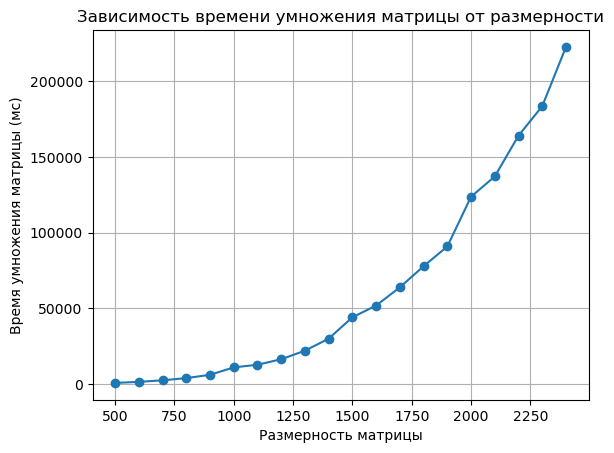

In [6]:
import matplotlib.pyplot as plt


def read_results(filename):
    sizes = []
    computation_times = []

    with open(filename, 'r') as file:
        while True:
            size_line = file.readline().strip()
            if not size_line:
                break
            size = int(size_line)

            generation_time = int(file.readline().strip())
            computation_time = int(file.readline().strip())
            total_time = int(file.readline().strip())
            task_size = int(file.readline().strip())

            sizes.append(size)
            computation_times.append(computation_time)

    return sizes, computation_times


def plot_results(sizes, computation_times):
    plt.plot(sizes, computation_times, marker='o', linestyle='-')
    plt.xlabel('Размерность матрицы')
    plt.ylabel('Время умножения матрицы (мс)')
    plt.title('Зависимость времени умножения матрицы от размерности')
    plt.grid(True)
    plt.show()


sizes, computation_times = read_results("results.txt")

plot_results(sizes, computation_times)